In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:


df = pd.read_csv("/content/stock_market_data-AAL (1).csv")
# Display the DataFrame
print(df.head())


         Date    Low   High  Close   Open
0  27-09-2005  19.10  21.40  19.30  21.05
1  28-09-2005  19.20  20.53  20.50  19.30
2  29-09-2005  20.10  20.58  20.21  20.40
3  30-09-2005  20.18  21.05  21.01  20.26
4  03-10-2005  20.90  21.75  21.50  20.90


In [ ]:
print(df.tail())

            Date    Low   High  Close    Open
4853  10-01-2025  17.80  18.45  18.38  17.930
4854  13-01-2025  17.32  17.98  17.60  17.915
4855  14-01-2025  17.79  18.24  18.21  17.790
4856  15-01-2025  17.97  18.56  18.07  18.540
4857  16-01-2025  17.78  18.33  18.29  18.020


In [ ]:
df

,Date,Low,High,Close,Open
0,27-09-2005,19.10,21.40,19.30,21.050
1,28-09-2005,19.20,20.53,20.50,19.300
2,29-09-2005,20.10,20.58,20.21,20.400
3,30-09-2005,20.18,21.05,21.01,20.260
4,03-10-2005,20.90,21.75,21.50,20.900
...,...,...,...,...,...
4853,10-01-2025,17.80,18.45,18.38,17.930
4854,13-01-2025,17.32,17.98,17.60,17.915
4855,14-01-2025,17.79,18.24,18.21,17.790
4856,15-01-2025,17.97,18.56,18.07,18.540


In [ ]:
features = ['Open', 'High', 'Low']
target = 'Close'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df[features]
y=df[target]
dates = df['Date']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=False
)

In [ ]:
print(x_train.shape,x_test.shape)

(3886, 3) (972, 3)


In [ ]:
best_params = {
    'bootstrap': True,
    'max_depth': 20,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 500
}

model = RandomForestRegressor(**best_params, random_state=42)

model.fit(x_train, y_train)


RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [ ]:
predictions = model.predict(x_test)

# Evaluate the model
score = model.score(x_test, y_test)  # R² score
print(f"Model R² score: {score}")


Model R² score: 0.9952802817465201


In [ ]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.0561245757876486
Root Mean Squared Error (RMSE): 0.2369062594944435
Mean Absolute Error (MAE): 0.17406108373342288


In [ ]:
# ipython-input-11-fb987379a09a

y_pred = predictions # assign predictions to y_pred

# Evaluate the model


In [ ]:
df

,Date,Low,High,Close,Open
0,27-09-2005,19.10,21.40,19.30,21.050
1,28-09-2005,19.20,20.53,20.50,19.300
2,29-09-2005,20.10,20.58,20.21,20.400
3,30-09-2005,20.18,21.05,21.01,20.260
4,03-10-2005,20.90,21.75,21.50,20.900
...,...,...,...,...,...
4853,10-01-2025,17.80,18.45,18.38,17.930
4854,13-01-2025,17.32,17.98,17.60,17.915
4855,14-01-2025,17.79,18.24,18.21,17.790
4856,15-01-2025,17.97,18.56,18.07,18.540


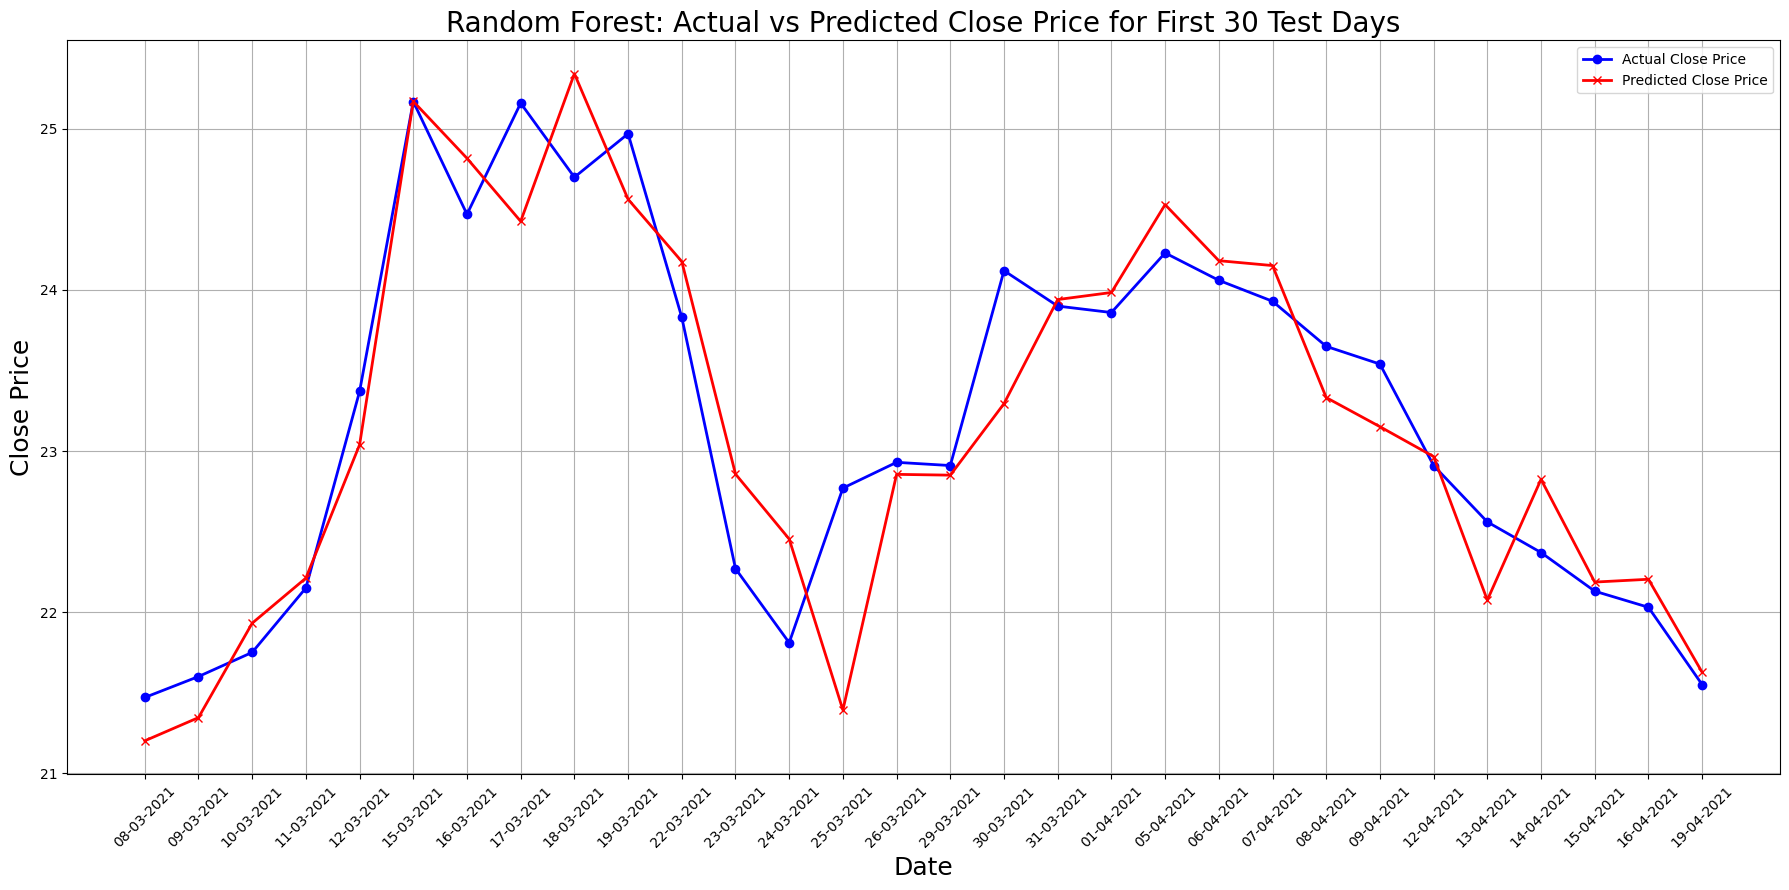

In [ ]:
import matplotlib.pyplot as plt

# Define the number of days
num_days = 30

# Get the indices of the test set to match with the dates
test_indices = x_test.index
actual_dates = dates.iloc[test_indices]  # Extract dates matching test indices

# Get the first 'num_days' data points from y_test and predictions
first_y_test = y_test.iloc[:num_days].values  # Convert y_test to array for plotting
first_predictions = predictions[:num_days]  # Predictions from Random Forest Regressor
first_dates = actual_dates.iloc[:num_days].values  # Extract the first 30 test dates as array

# Plot the data
plt.figure(figsize=(18, 9))

# Actual close prices
plt.plot(first_dates, first_y_test, label='Actual Close Price', color='blue', marker='o', linewidth=2, markersize=6)

# Predicted close prices
plt.plot(first_dates, first_predictions, label='Predicted Close Price', color='red', marker='x', linewidth=2, markersize=6)

# Formatting
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.title(f'Random Forest: Actual vs Predicted Close Price for First {num_days} Test Days', fontsize=20)
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("rf_first_30_test_days_plot.png", dpi=300)  # Save the plot in high resolution
plt.show()


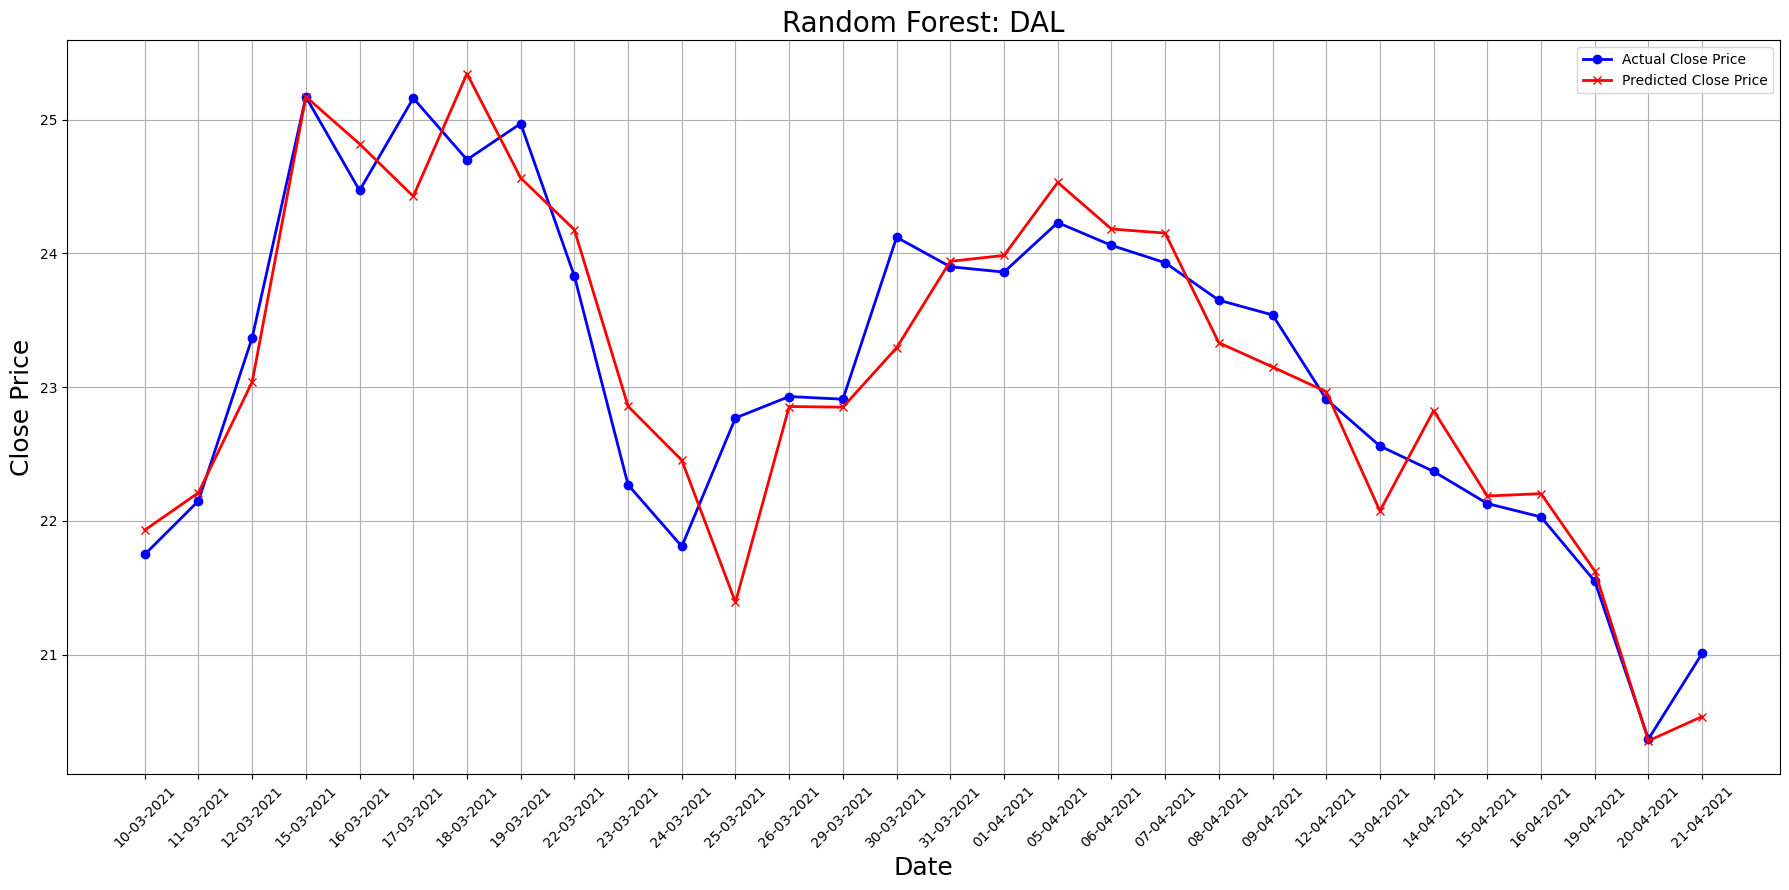

In [ ]:
import matplotlib.pyplot as plt

# Define the number of days
num_days = 30

# Get the indices of the test set to match with the dates
test_indices = x_test.index
actual_dates = dates.iloc[test_indices]  # Extract dates matching test indices

# Adjust the data to start 2 days later
adjusted_y_test = y_test.iloc[2:num_days + 2].values  # Start from the 3rd entry (2 days later) and take 30 values
adjusted_predictions = predictions[2:num_days + 2]  # Predictions starting 2 days later
adjusted_dates = actual_dates.iloc[2:num_days + 2].values  # Dates starting 2 days later

# Plot the data
plt.figure(figsize=(18, 9))

# Actual close prices
plt.plot(adjusted_dates, adjusted_y_test, label='Actual Close Price', color='blue', marker='o', linewidth=2, markersize=6)

# Predicted close prices
plt.plot(adjusted_dates, adjusted_predictions, label='Predicted Close Price', color='red', marker='x', linewidth=2, markersize=6)

# Formatting
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.title(f'Random Forest: DAL', fontsize=20)
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("rf_dal.png", dpi=300)  # Save the plot in high resolution
plt.show()
